## Create the circuit

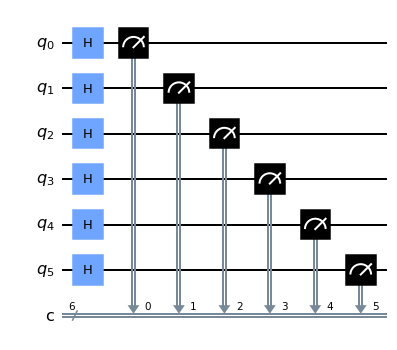

In [1]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
%matplotlib inline


qc = QuantumCircuit(6, 6)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
qc.draw(output="mpl")

##  run the circuit

{'000000': 11, '000001': 16, '010000': 20, '010001': 18, '010010': 11, '010011': 17, '010100': 16, '010101': 16, '010110': 16, '010111': 16, '011000': 6, '011001': 25, '011010': 14, '011011': 3, '011100': 14, '011101': 17, '011110': 12, '011111': 29, '000010': 17, '100000': 9, '100001': 15, '100010': 19, '100011': 18, '100100': 12, '100101': 19, '100110': 12, '100111': 16, '101000': 23, '101001': 16, '101010': 25, '101011': 19, '101100': 13, '101101': 18, '101110': 16, '101111': 19, '000011': 24, '110000': 11, '110001': 20, '110010': 17, '110011': 16, '110100': 13, '110101': 21, '110110': 16, '110111': 15, '111000': 22, '111001': 10, '111010': 12, '111011': 17, '111100': 16, '111101': 15, '111110': 11, '111111': 13, '000100': 17, '000101': 16, '000110': 11, '000111': 19, '001000': 12, '001001': 13, '001010': 16, '001011': 21, '001100': 16, '001101': 17, '001110': 19, '001111': 15}


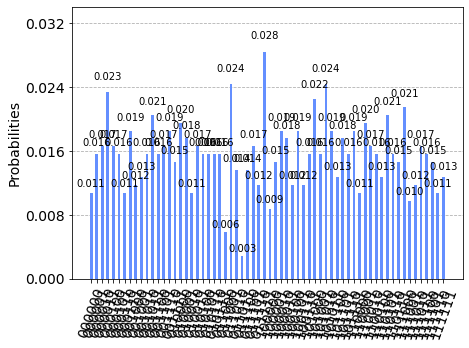

In [2]:
backend = Aer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(qc, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(qc)  
print(counts)
graph = plot_histogram(counts)
display(graph)

In [3]:
data = result.to_dict()
for key, value in data.items():
    print(key, ' : ', value)
count = data["results"][0]["data"]["counts"]
print("\n",count)

backend_name  :  qasm_simulator
backend_version  :  0.7.0
qobj_id  :  82a1a5af-0c59-4a44-b07d-13584588ce0f
job_id  :  694be55b-a247-430f-b2cd-834876bdad34
success  :  True
results  :  [{'shots': 1024, 'success': True, 'data': {'counts': {'0x0': 11, '0x1': 16, '0x10': 20, '0x11': 18, '0x12': 11, '0x13': 17, '0x14': 16, '0x15': 16, '0x16': 16, '0x17': 16, '0x18': 6, '0x19': 25, '0x1a': 14, '0x1b': 3, '0x1c': 14, '0x1d': 17, '0x1e': 12, '0x1f': 29, '0x2': 17, '0x20': 9, '0x21': 15, '0x22': 19, '0x23': 18, '0x24': 12, '0x25': 19, '0x26': 12, '0x27': 16, '0x28': 23, '0x29': 16, '0x2a': 25, '0x2b': 19, '0x2c': 13, '0x2d': 18, '0x2e': 16, '0x2f': 19, '0x3': 24, '0x30': 11, '0x31': 20, '0x32': 17, '0x33': 16, '0x34': 13, '0x35': 21, '0x36': 16, '0x37': 15, '0x38': 22, '0x39': 10, '0x3a': 12, '0x3b': 17, '0x3c': 16, '0x3d': 15, '0x3e': 11, '0x3f': 13, '0x4': 17, '0x5': 16, '0x6': 11, '0x7': 19, '0x8': 12, '0x9': 13, '0xa': 16, '0xb': 21, '0xc': 16, '0xd': 17, '0xe': 19, '0xf': 15}}, 'meas_level

## export Data as CSV

In [4]:
import csv

with open('data_6.csv', mode='w',newline='') as csv_file:
    fieldnames = ['State', 'Counts']
    thewriter = csv.DictWriter(csv_file, fieldnames=fieldnames)

    thewriter.writeheader()
    i=0
    for key in count.keys():
        csv_file.write("%s,%s\n"%(i,count[key]))
        i+=1

## plot

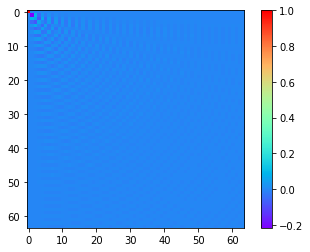

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataframe = pd.read_csv("data_6.csv")
x = dataframe.State
y = dataframe.count
y = x
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sinc(R)
plt.imshow(Z, cmap = 'rainbow')
plt.colorbar()

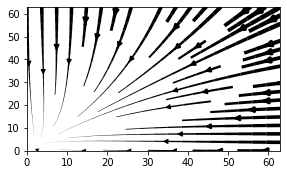

In [6]:
# Stramline
import matplotlib.gridspec as gridspec
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y,U,V, density=0.6, color='k', linewidth=lw)